In [10]:
import pandas as pd
import numpy
import matplotlib as plt
from matplotlib import font_manager,rc
import matplotlib.pyplot as plt	
import seaborn as sns
import folium
import re

# 명사추출
from konlpy.tag import Twitter
from konlpy.tag import Kkma

# 워드클라우드
from wordcloud import WordCloud

In [11]:
df =pd.read_csv('./df_blog_busantrip_100.csv',encoding='utf-8',index_col=0)

In [12]:
df

,title,datetime,content,tag
0,부산 여행코스 해운대 청사포 다릿돌 전망대 바다,2022. 9. 4. 23:50,부산 여행코스 해운대 청사포 다릿돌 전망대 바다 가볍게 들리기 좋았던 부산 여행코스...,#부산여행코스 #부산청사포다릿돌전망대 #청사포 #부산전망대 #해운대청사포 #부산청사...
1,부산여행 가볼만한곳 부산 유엔공원 평화공원,2022. 10. 22. 7:00,2022.9.3.(토)\n가을 부산에 다녀오면서\n그동안 한번 가보고싶던\n부산여행...,#부산유엔공원 #부산평화공원 #부산공원 #부산여행 #부산가볼만한곳
2,부산여행 2박 3일 : 현지인 코스로 모십니다😇,2022. 6. 22. 0:04,부산여행 2박 3일\n정말 오랜만에 써보는 국내여행 후기😇\n코로나가 터진 이후로 ...,#부산여행 #부산2박3일 #부산여행코스 #영도여행 #해운대 #영도 #광안리 #부산역...
3,부산 여행 코스 추천 관광지 먹거리 부산 드라이브 코스,2022. 9. 30. 0:05,부산 여행 코스 추천 관광지 먹거리 부산 드라이브 코스\n가을의 시작인 9월도 어느...,#부산여행 #부산여행코스추천 #부산관광지 #부산먹거리 #부산드라이브코스
4,"부산여행 파라다이스호텔부산 조식, 온더플레이트 조식 메뉴 후기",2022. 8. 28. 22:36,파라다이스호텔 부산 오션뷰 디럭스👇🏻👇🏻 온더플레이트 디너 뷔페👇🏻👇🏻👇🏻 지난 부...,#부산 #부산여행 #해운대 #해운대여행 #해운대호텔 #부산호텔 #해운대호텔추천 #파...
...,...,...,...,...
95,어쩌다 또 부산 여행(1) (feat.고양이가 생선가게를 지나칠리가..),2022. 8. 22. 0:07,어쩌다보니 또 부산…여행..\nS T A R T 이번엔 뚜벅이가 아닌 차타고 슝슝…...,#주간일기챌린지
96,[부산여행] 썬치킨 용호점,2022. 10. 1. 16:30,"안녕하세요, 여행블로거 내세상입니다. 블로그에서 부산여행 중이죠!\n썬치킨 용호점 ...",#부산여행 #부산용호동 #부산용호동치킨 #썬치킨 #썬치킨용호점
97,부산여행 광안사진 인생네컷 셀프사진관 하루필름 광안점,2022. 9. 20. 16:35,유행에 늦은 1 인 😵\n간만에 부산에서 만난친구랑 인생네컷같은\n기념될만한 사진남...,#광안리 #광안리하루필름 #하루필름 #광안리사진 #광안리사진맛집 #인생네컷 #내돈내...
98,부산 여행 영도 남포동 야경 맛집! 누리바라기!,2022. 10. 5. 14:30,누리바라기\n부산 서구 남부민동 50-40\n*이용시간: 상시개방\n051-240-...,#부산여행 #국내여행 #부산야경 #부산남포동야경 #부산영도야경 #누리바라기야경 #부...


In [13]:
df['content'].str[0:]

0     부산 여행코스 해운대 청사포 다릿돌 전망대 바다 가볍게 들리기 좋았던 부산 여행코스...
1     2022.9.3.(토)\n가을 부산에 다녀오면서\n그동안 한번 가보고싶던\n부산여행...
2     부산여행 2박 3일\n정말 오랜만에 써보는 국내여행 후기😇\n코로나가 터진 이후로 ...
3     부산 여행 코스 추천 관광지 먹거리 부산 드라이브 코스\n가을의 시작인 9월도 어느...
4     파라다이스호텔 부산 오션뷰 디럭스👇🏻👇🏻 온더플레이트 디너 뷔페👇🏻👇🏻👇🏻 지난 부...
                            ...                        
95    어쩌다보니 또 부산…여행..\nS T A R T 이번엔 뚜벅이가 아닌 차타고 슝슝…...
96    안녕하세요, 여행블로거 내세상입니다. 블로그에서 부산여행 중이죠!\n썬치킨 용호점 ...
97    유행에 늦은 1 인 😵\n간만에 부산에서 만난친구랑 인생네컷같은\n기념될만한 사진남...
98    누리바라기\n부산 서구 남부민동 50-40\n*이용시간: 상시개방\n051-240-...
99    이제 가을이니까아\n차분한 가을 노래로 시작해볼게요오 9월의 어느날\n러빈과 함께 ...
Name: content, Length: 98, dtype: object

In [14]:
df['content']= df['content'].str.replace(pat=r'[^\w]',repl=r' ',regex=True)
df['content']=df["content"].map(lambda x : (re.sub(' +', ' ', x)))

In [15]:
df

,title,datetime,content,tag
0,부산 여행코스 해운대 청사포 다릿돌 전망대 바다,2022. 9. 4. 23:50,부산 여행코스 해운대 청사포 다릿돌 전망대 바다 가볍게 들리기 좋았던 부산 여행코스...,#부산여행코스 #부산청사포다릿돌전망대 #청사포 #부산전망대 #해운대청사포 #부산청사...
1,부산여행 가볼만한곳 부산 유엔공원 평화공원,2022. 10. 22. 7:00,2022 9 3 토 가을 부산에 다녀오면서 그동안 한번 가보고싶던 부산여행 가볼만한...,#부산유엔공원 #부산평화공원 #부산공원 #부산여행 #부산가볼만한곳
2,부산여행 2박 3일 : 현지인 코스로 모십니다😇,2022. 6. 22. 0:04,부산여행 2박 3일 정말 오랜만에 써보는 국내여행 후기 코로나가 터진 이후로 내 일...,#부산여행 #부산2박3일 #부산여행코스 #영도여행 #해운대 #영도 #광안리 #부산역...
3,부산 여행 코스 추천 관광지 먹거리 부산 드라이브 코스,2022. 9. 30. 0:05,부산 여행 코스 추천 관광지 먹거리 부산 드라이브 코스 가을의 시작인 9월도 어느새...,#부산여행 #부산여행코스추천 #부산관광지 #부산먹거리 #부산드라이브코스
4,"부산여행 파라다이스호텔부산 조식, 온더플레이트 조식 메뉴 후기",2022. 8. 28. 22:36,파라다이스호텔 부산 오션뷰 디럭스 온더플레이트 디너 뷔페 지난 부산여행때 파라다이스...,#부산 #부산여행 #해운대 #해운대여행 #해운대호텔 #부산호텔 #해운대호텔추천 #파...
...,...,...,...,...
95,어쩌다 또 부산 여행(1) (feat.고양이가 생선가게를 지나칠리가..),2022. 8. 22. 0:07,어쩌다보니 또 부산 여행 S T A R T 이번엔 뚜벅이가 아닌 차타고 슝슝 역시나...,#주간일기챌린지
96,[부산여행] 썬치킨 용호점,2022. 10. 1. 16:30,안녕하세요 여행블로거 내세상입니다 블로그에서 부산여행 중이죠 썬치킨 용호점 이번에는...,#부산여행 #부산용호동 #부산용호동치킨 #썬치킨 #썬치킨용호점
97,부산여행 광안사진 인생네컷 셀프사진관 하루필름 광안점,2022. 9. 20. 16:35,유행에 늦은 1 인 간만에 부산에서 만난친구랑 인생네컷같은 기념될만한 사진남기고 싶...,#광안리 #광안리하루필름 #하루필름 #광안리사진 #광안리사진맛집 #인생네컷 #내돈내...
98,부산 여행 영도 남포동 야경 맛집! 누리바라기!,2022. 10. 5. 14:30,누리바라기 부산 서구 남부민동 50 40 이용시간 상시개방 051 240 4061 ...,#부산여행 #국내여행 #부산야경 #부산남포동야경 #부산영도야경 #누리바라기야경 #부...


In [16]:
df['content'].to_csv('./블로그_100_split.csv',encoding='utf-8',index=False)

In [17]:
df['content'].str.split(' ',expand=True)

,0,1,2,3,4,5,6,7,8,9,...,928,929,930,931,932,933,934,935,936,937
0,부산,여행코스,해운대,청사포,다릿돌,전망대,바다,가볍게,들리기,좋았던,...,None,None,None,None,None,None,None,None,None,None
1,2022,9,3,토,가을,부산에,다녀오면서,그동안,한번,가보고싶던,...,None,None,None,None,None,None,None,None,None,None
2,부산여행,2박,3일,정말,오랜만에,써보는,국내여행,후기,코로나가,터진,...,None,None,None,None,None,None,None,None,None,None
3,부산,여행,코스,추천,관광지,먹거리,부산,드라이브,코스,가을의,...,None,None,None,None,None,None,None,None,None,None
4,파라다이스호텔,부산,오션뷰,디럭스,온더플레이트,디너,뷔페,지난,부산여행때,파라다이스호텔에서,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,어쩌다보니,또,부산,여행,S,T,A,R,T,이번엔,...,None,None,None,None,None,None,None,None,None,None
96,안녕하세요,여행블로거,내세상입니다,블로그에서,부산여행,중이죠,썬치킨,용호점,이번에는,부산,...,None,None,None,None,None,None,None,None,None,None
97,유행에,늦은,1,인,간만에,부산에서,만난친구랑,인생네컷같은,기념될만한,사진남기고,...,None,None,None,None,None,None,None,None,None,None
98,누리바라기,부산,서구,남부민동,50,40,이용시간,상시개방,051,240,...,None,None,None,None,None,None,None,None,None,None


In [18]:
# 파일로드
data = pd.read_csv('./블로그_100_split.csv',encoding='utf-8')
data = data['content']

In [19]:
data

0     부산 여행코스 해운대 청사포 다릿돌 전망대 바다 가볍게 들리기 좋았던 부산 여행코스...
1     2022 9 3 토 가을 부산에 다녀오면서 그동안 한번 가보고싶던 부산여행 가볼만한...
2     부산여행 2박 3일 정말 오랜만에 써보는 국내여행 후기 코로나가 터진 이후로 내 일...
3     부산 여행 코스 추천 관광지 먹거리 부산 드라이브 코스 가을의 시작인 9월도 어느새...
4     파라다이스호텔 부산 오션뷰 디럭스 온더플레이트 디너 뷔페 지난 부산여행때 파라다이스...
                            ...                        
93    어쩌다보니 또 부산 여행 S T A R T 이번엔 뚜벅이가 아닌 차타고 슝슝 역시나...
94    안녕하세요 여행블로거 내세상입니다 블로그에서 부산여행 중이죠 썬치킨 용호점 이번에는...
95    유행에 늦은 1 인 간만에 부산에서 만난친구랑 인생네컷같은 기념될만한 사진남기고 싶...
96    누리바라기 부산 서구 남부민동 50 40 이용시간 상시개방 051 240 4061 ...
97    이제 가을이니까아 차분한 가을 노래로 시작해볼게요오 9월의 어느날 러빈과 함께 부산...
Name: content, Length: 98, dtype: object

In [35]:
# 불용어제거
f = open("./한국어불용어.txt",'rt',encoding='utf-8') #에러나서 수정 
lines = f.readlines()
stopwords = []
for line in lines:
    line = line.replace('\n', '')
    stopwords.append(line)
f.close()

In [36]:
print('불용어 단어 리스트: ', ' '.join(stopwords))

불용어 단어 리스트:  아 휴 아이구 아이쿠 아이고 어 나 우리 저희 따라 의해 을 를 에 의 가 으로 로 에게 뿐이다 의거하여 근거하여 입각하여 기준으로 예하면 예를 들면 예를 들자면 저 소인 소생 저희 지말고 하지마 하지마라 다른 물론 또한 그리고 비길수 없다 해서는 안된다 뿐만 아니라 만이 아니다 만은 아니다 막론하고 관계없이 그치지 않다 그러나 그런데 하지만 든간에 논하지 않다 따지지 않다 설사 비록 더라도 아니면 만 못하다 하는 편이 낫다 불문하고 향하여 향해서 향하다 쪽으로 틈타 이용하여 타다 오르다 제외하고 이 외에 이 밖에 하여야 비로소 한다면 몰라도 외에도 이곳 여기 부터 기점으로 따라서 할 생각이다 하려고하다 이리하여 그리하여 그렇게 함으로써 하지만 일때 할때 앞에서 중에서 보는데서 으로써 로써 까지 해야한다 일것이다 반드시 할줄알다 할수있다 할수있어 임에 틀림없다 한다면 등 등등 제 겨우 단지 다만 할뿐 딩동 댕그 대해서 대하여 대하면 훨씬 얼마나 얼마만큼 얼마큼 남짓 여 얼마간 약간 다소 좀 조금 다수 몇 얼마 지만 하물며 또한 그러나 그렇지만 하지만 이외에도 대해 말하자면 뿐이다 다음에 반대로 반대로 말하자면 이와 반대로 바꾸어서 말하면 바꾸어서 한다면 만약 그렇지않으면 까악 툭 딱 삐걱거리다 보드득 비걱거리다 꽈당 응당 해야한다 에 가서 각 각각 여러분 각종 각자 제각기 하도록하다 와 과 그러므로 그래서 고로 한 까닭에 하기 때문에 거니와 이지만 대하여 관하여 관한 과연 실로 아니나다를가 생각한대로 진짜로 한적이있다 하곤하였다 하 하하 허허 아하 거바 와 오 왜 어째서 무엇때문에 어찌 하겠는가 무슨 어디 어느곳 더군다나 하물며 더욱이는 어느때 언제 야 이봐 어이 여보시오 흐흐 흥 휴 헉헉 헐떡헐떡 영차 여차 어기여차 끙끙 아야 앗 아야 콸콸 졸졸 좍좍 뚝뚝 주룩주룩 솨 우르르 그래도 또 그리고 바꾸어말하면 바꾸어말하자면 혹은 혹시 답다 및 그에 따르는 때가 되어 즉 지든지 설령 가령 하더라도 할지라도 일지라도 지든지 몇 거의 하마터면 

In [37]:
data = [token for token in data if token not in stopwords]
preprocessed_text= ' '.join(data)
print(preprocessed_text)

부산 여행코스 해운대 청사포 다릿돌 전망대 바다 가볍게 들리기 좋았던 부산 여행코스 해운대 청사포 태풍 힌남노 위력이 초강력 상태로 관측 되면서 시시각각 쏟아지는 기상 상황에 긴장된 시간을 보내고 있는데요 지금 시각 대만에 머물고 있는 상태로 이틀후 영향권에 들어설 제주는 벌써부터 강한 바람과 폭우가 내리고 있다네요 아무쪼록 무사히 지나가길 바랄뿐입니다 열씨미 부산 해운대구 달맞이길 아래는 청사포라는 작은 포구가 있어요 푸른 모래를 뜻하는 청사포라고 하는데요 포구에서 걸어 10여분 거리엔 청사포 다릿돌 전망대가 있어요 지난 부산 여행코스로 해운대 해수욕장을 비롯 송정해수욕장과 부산 청사포 다릿돌 전망대를 다녀왔어요 점심 전에 찾아간 해운대 청사포는 흐린 날씨에도 불구하고 여행객들이 많이 찾는 핫플이었어요 부산 전망대로 가기 위해 횟집 주변에 주차를 하고 관광안내소 오른쪽 계단을 올라 전망대로 향했어요 걷다보면 부산 바다를 향해 파란색으로 뻗어나간 전망대가 바로 보였는데요 옆에서 볼땐 길이가 짧아 보였어요 이 날은 날씨는 흐렸지만 바다는 고요했어요 파도의 일렁임도 없는 잔잔함이었는데요 수평선 위로 희미하게 보이는 하늘빛은 금방이라도 파란 하늘을 보여줄듯 했어요 전망대로 가는 길은 철로 옆 두 사람 걸을 정도 폭으로 길이 나있었어요 작년에 다녀가고 오랜만에 찾은 길이었는데 그 때 공사중이었던 부분은 이미 완공되어 말끔하게 정비 되어 있었어요 청사포 다릿돌 전망대 아랫쪽은 미포정거장에서 출발한 해변열차가 정차하는 정류장이 있었어요 마침 해변열차가 도착해 사진을 찍었는데요 청사포 정류장을 지나 구덕포까지 4 8km 구간으로 연결된 부산 여행코스였어요 부산 전망대로 들어서는 입구는 광장처럼 넓어 가장자리에 의자들이 놓였어요 여행자들이 일시에 모여들었다 빠지고 다시 몰려들었어요 부산 청사포 다릿돌 전망대는 무료로 운영되고 있었어요 기상 악화시엔 유동적으로 운영하고 평시엔 오전 9시부터 오후 6시까지 개방했어요 광장 한켠에는 하얀 우체통이 세워져 있었어요 관광지마다 설치된

In [38]:
len(preprocessed_text) # 불용어 제거후 186,314

186314

In [39]:
# 데이터가져오기
f = open("./블로그_100_split.csv",'rt',encoding='utf-8')
lines = f.readlines() # 한 줄을가져와서 문자열 변환
line = []
for i in range(len(lines)):
    line.append(lines[i])
f.close()

# print(line)

In [40]:
compile = re.compile("[^ ㄱ-ㅣ가-힣]+")
for i in range(len(line)):

    a = compile.sub("",line[i])
    line[i] = a
# print(line)

In [41]:
# 문장분석 okt 사용
from konlpy.tag import Okt
okt = Okt()
result =[]
result = [okt.nouns(i) for i in line] #명사만 추출
# final_result= [r for i in result for r in i]
final_result=[r for i in result for r in i if len(r)>1] # 한개는 제거
# print(final_result)

In [43]:
#많이 나온 단어 상위백개
korean = pd.Series(final_result).value_counts(ascending=False).head(100)
print('키워드')
print(korean)

키워드
부산      1272
여행       454
해운대      268
시간       248
바다       247
        ... 
객실        41
커피        41
가격        41
케이블카      41
위해        41
Length: 100, dtype: int64


In [44]:
count_data = korean.to_dict()

In [45]:
from collections import Counter


count = Counter(count_data)

In [46]:
count

Counter({'부산': 1272,
         '여행': 454,
         '해운대': 268,
         '시간': 248,
         '바다': 247,
         '코스': 210,
         '사진': 209,
         '부산여행': 206,
         '마을': 173,
         '추천': 159,
         '호텔': 153,
         '이용': 150,
         '맛집': 134,
         '사람': 126,
         '생각': 124,
         '숙소': 116,
         '풍경': 107,
         '광안': 106,
         '바로': 105,
         '요트': 104,
         '문화': 104,
         '해변': 102,
         '야경': 101,
         '투어': 97,
         '거리': 94,
         '우리': 94,
         '전망대': 91,
         '방문': 87,
         '카페': 87,
         '때문': 87,
         '광안대교': 82,
         '정도': 82,
         '모습': 81,
         '타고': 78,
         '장소': 75,
         '정말': 75,
         '스카이': 74,
         '여기': 73,
         '진짜': 73,
         '가장': 72,
         '구경': 71,
         '공원': 69,
         '열차': 69,
         '영도': 68,
         '타워': 66,
         '송도': 66,
         '어묵': 66,
         '도착': 65,
         '하나': 65,
         '흰여울': 64,
         '시장': 60,

In [47]:
font_path='C:/Users/admin/Downloads/nanum-all/나눔 글꼴/NanumBarunGothic.ttf'

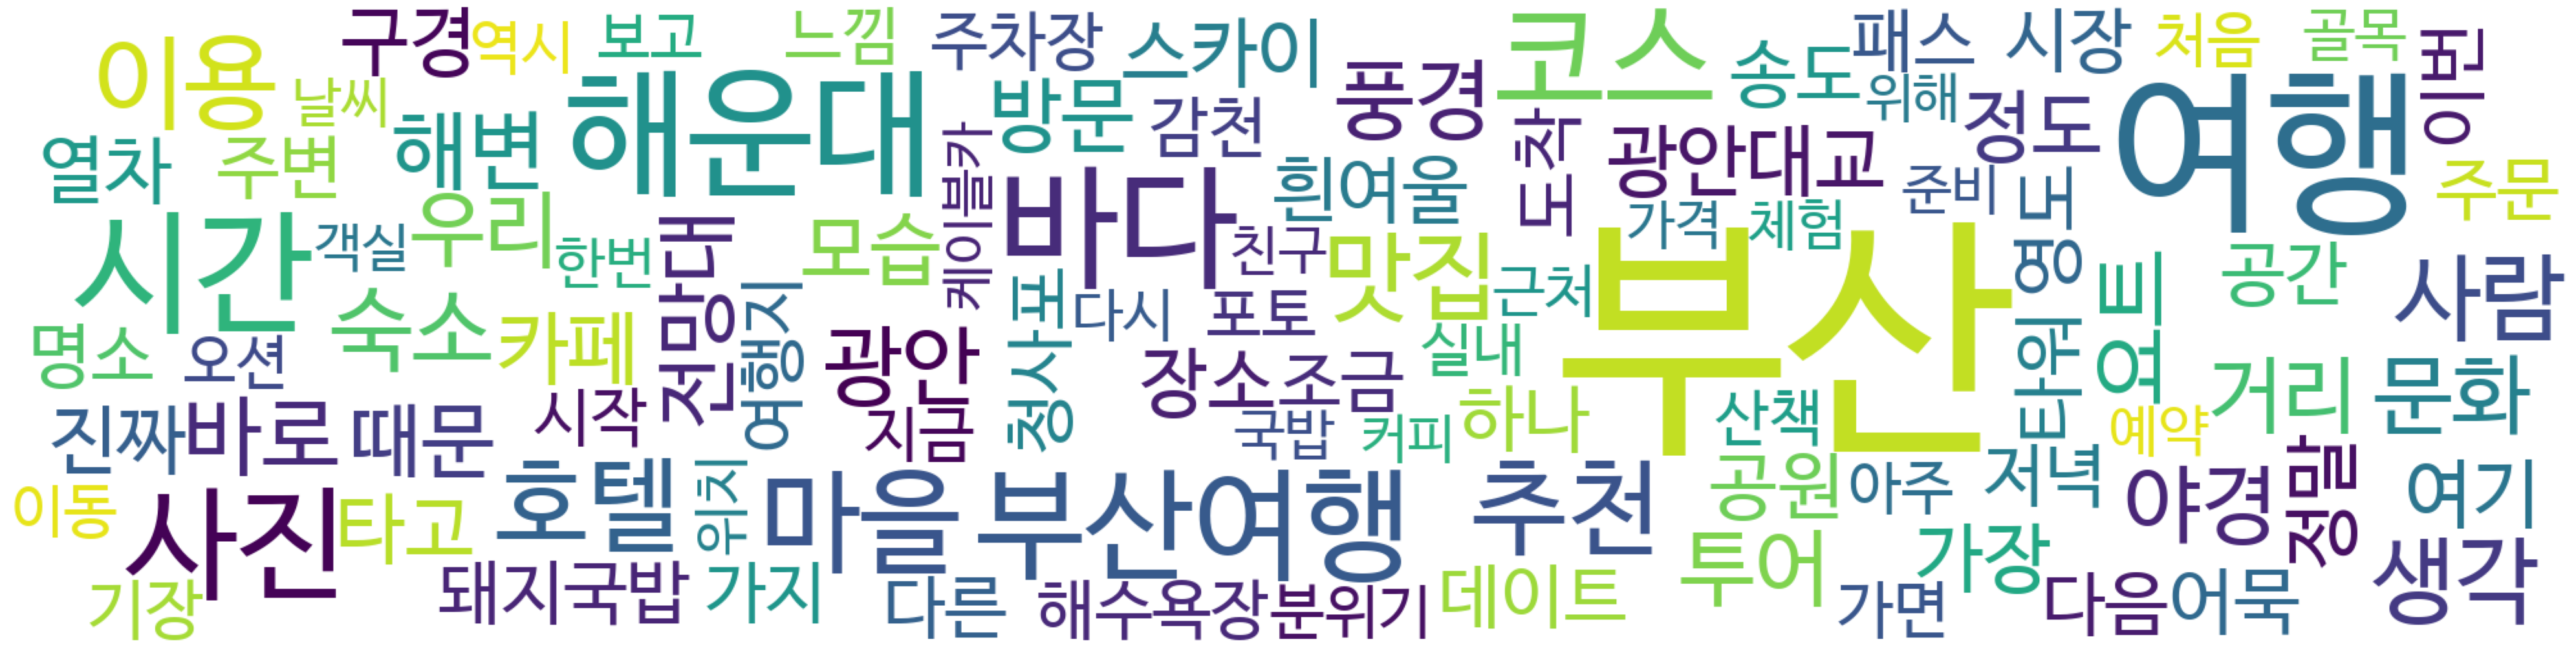

In [48]:
#wordcloud 만들기
wc = WordCloud(max_font_size=200,
	font_path = font_path,
	background_color="white",
    width=2000, height=500).generate_from_frequencies(dict(count))
    # font 경로 개별적으로 설정해야함

plt.figure(figsize = (40,40))
plt.imshow(wc)
plt.tight_layout(pad=0)
plt.axis('off')
plt.show()